In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## get all the label names using the validation set

In [8]:
valid_path="archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

## Loading the saved keras model

In [11]:
cnnModel = tf.keras.models.load_model('plantCNN.keras')

## Visualising and Performing Prediction on Single image

In [16]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.4 MB/s eta 0:00:16
    --------------------------------------- 0.5/38.8 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.5/38.8 MB 9.8 MB/s eta 0:00:04
   - -------------------------------------- 1.9/38.8 MB 10.9 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/38.8 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.8 MB 8.6 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.8 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.8 MB 8.2 MB/s eta 0:00:05
   --- ------------------------------------ 3.6/38.8 MB 8.5 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.8 MB 8.1 MB/s eta 0:00:05
   ---- ----------------------------------- 4.2/38.8 MB 7.8 MB/s eta 0:00:05
   ---- ----

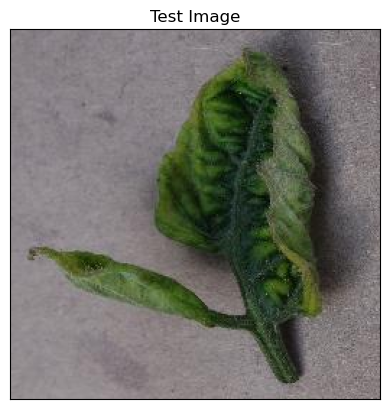

In [17]:
#Test Image Visualization
import cv2
image_path = "./archive/test/test/TomatoYellowCurlVirus3.JPG"
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnnModel.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


In [20]:
predictions

array([[1.4643819e-10, 4.0139733e-10, 9.1195709e-09, 2.3012644e-08,
        4.5436639e-08, 4.7299598e-10, 9.1302486e-11, 7.2464407e-10,
        5.3885451e-12, 1.9404840e-09, 6.8703349e-11, 3.9952925e-09,
        2.3576039e-08, 7.2610966e-09, 7.5448252e-11, 9.8947845e-09,
        9.3549390e-10, 1.6752595e-10, 9.4813565e-08, 7.1176807e-09,
        8.1896333e-13, 1.0017164e-09, 6.2754602e-10, 5.8032566e-07,
        3.9686188e-09, 1.7048164e-08, 4.7167116e-08, 1.0809363e-09,
        1.4053971e-07, 8.2484648e-06, 6.7464235e-08, 9.4938207e-07,
        7.4435252e-07, 4.7837211e-06, 2.1227531e-06, 9.9998188e-01,
        1.9751121e-07, 2.5007341e-09]], dtype=float32)

In [21]:
result_index=np.argmax(predictions)
result_index

35

In [22]:
class_name[result_index]

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'

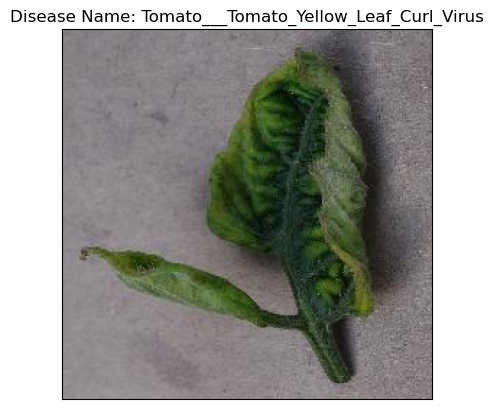

In [23]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [32]:
# we can confirm this result by checking the name of image file for this plant
actual=''
for i in image_path[::-1]:
    if(i=='/'):
        break
    else:
        actual+=i

In [33]:
actual[::-1]

'TomatoYellowCurlVirus3.JPG'

## Hence verified that it's predicting correctly